In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_test.shape

(10000,)

In [5]:
y_train.shape

(60000,)

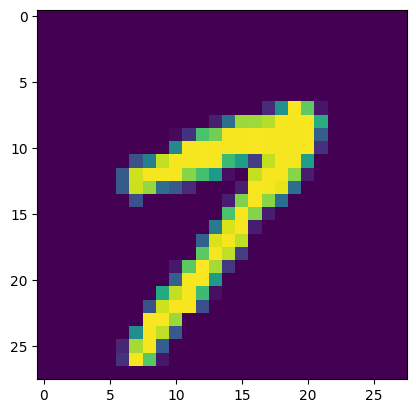

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[79])

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2790 - accuracy: 0.9196 - val_loss: 0.1420 - val_accuracy: 0.9579
Epoch 2/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1156 - accuracy: 0.9648 - val_loss: 0.1255 - val_accuracy: 0.9629
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0804 - accuracy: 0.9758 - val_loss: 0.1023 - val_accuracy: 0.9703
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0590 - accuracy: 0.9818 - val_loss: 0.0973 - val_accuracy: 0.9732
Epoch 5/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0457 - accuracy: 0.9856 - val_loss: 0.1013 - val_accuracy: 0.9732
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.1096 - val_accuracy: 0.9712
Epoch 7/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.1057 - val_accuracy

In [12]:
y_prob=model.predict(x_test)
y_pred=y_prob.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9781

Text(0, 0.5, 'Calorie Burnage')

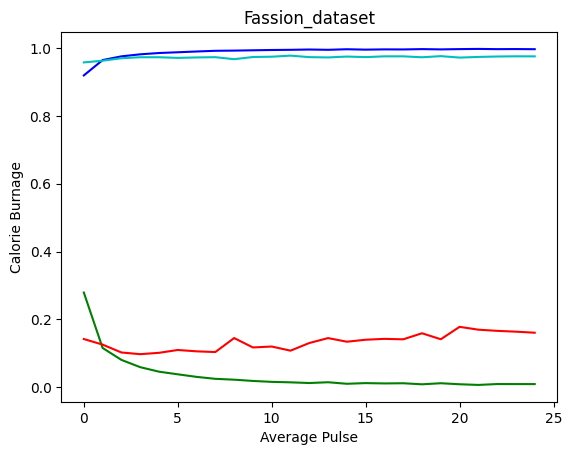

In [14]:
plt.plot(history.history['loss'],color='g')
plt.plot(history.history['val_loss'],color='r')
plt.plot(history.history['accuracy'],color='b')
plt.plot(history.history['val_accuracy'],color='c')
plt.title("Fassion_dataset", loc = 'center')
plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")

313/313 [==============================] - 1s 2ms/step


array([[1.2891249e-22, 9.0524264e-16, 2.7551528e-16, ..., 9.9999994e-01,
        1.8162528e-14, 1.5139442e-08],
       [1.1873157e-16, 5.9476667e-11, 9.9999994e-01, ..., 8.7182353e-22,
        6.1917355e-15, 4.4574185e-26],
       [8.0686270e-08, 9.9999565e-01, 9.3796615e-08, ..., 3.1779305e-08,
        3.9058286e-06, 5.0143046e-11],
       ...,
       [8.3302046e-23, 4.3085162e-16, 1.3292471e-26, ..., 2.4978134e-13,
        1.6368478e-20, 1.8098399e-12],
       [7.3299819e-24, 2.8600087e-27, 1.0400803e-32, ..., 4.1926087e-22,
        1.5585942e-12, 5.7232204e-26],
       [2.1921968e-23, 1.3821853e-22, 1.0497613e-19, ..., 4.7999629e-28,
        1.0844952e-17, 4.4424027e-23]], dtype=float32)

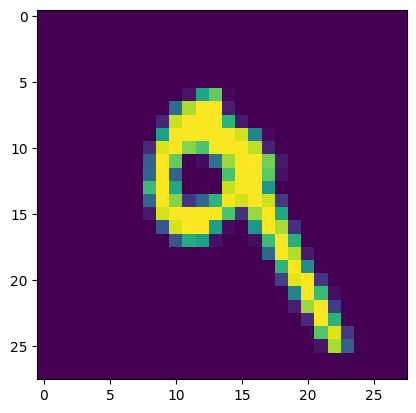

In [15]:
plt.imshow(x_test[7])
model.predict(x_test)